```
BEGIN ASSIGNMENT
solutions_pdf: true
requirements: requirements.txt
export_cell:
    instructions: "These are some submission instructions."
generate: 
    pdf: true
    zips: false
```

# PS 88 Week 3 Lab: Simulations and Pivotal Voters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import Table
from ipywidgets import interact
%matplotlib inline

## Part 1: Plotting expected utility

We can use Python to do expected utility calculations and explore the relationship between parameters in decision models and optimal choices. 

In class we showed that the expected utility for voting for a preferred candidate can be written $p_1 b - c$. A nice way to do calculations like this is to first assign values to the variables:

In [36]:
p1=.6
b=100
c=2
p1*b-c

58.0

**Question 1.1. Write code to compute the expected utility to voting when $p_1 = .5$, $b=50$, and $c=.5$**

In [37]:
#Answer to 1.1 here
p1=.5
b=50
c=.5
p1*b-c

24.5

We don't necessarily care about these expected utilities on their own, but how they compare to the expected utility to abstaining. 

**Question 1.2. If $b=50$ and $p_0 = .48$, write code to compute the expected utility to abstaining.**

In [38]:
# Code for 1.2 here
p0=.48
b=50
p0*b

24.0

**Question 1.3. Given 1.1 and 1.2, is voting the expected utility maximizing choice given given these parameters?**

Answer to 1.3 here

We can also use the graphic capabilities of Python to learn more about how these models work. 

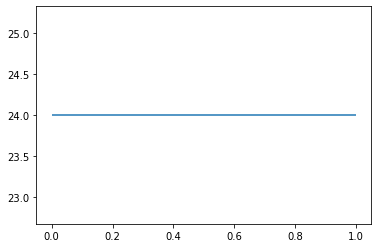

In [5]:
plt.hlines(p0*b, 0,1, label='Abstaining Utility')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
def plotEU(b):
    plt.hlines(p0*b, 0,2, label='Abstaining Utility')
    c = np.arange(0,2, step=.01)
    y = p1*b-c
    plt.ticklabel_format(style='plain')
    plt.xticks(rotation=45)
    plt.plot(c,y, label='Voting Expected Utility')
#    plt.vlines(no_lobbying+1e7-1e5*p, -2e7, 0, linestyles="dashed")
    plt.xlabel('Voting Cost')
    plt.ylabel('Expected Utility')
    plt.legend()
interact(plotEU, b=IntSlider(min=0,max=300, value=100))

interactive(children=(IntSlider(value=100, description='b', max=300), Output()), _dom_classes=('widget-interac…

<function __main__.plotEU(b)>

## Part 2: Simulating votes

How can we estimate the probability of a vote mattering? One route is to use probability theory, which in realistic settings (like the electoral college in the US) requires lots of complicated mathematical manipulation. Another way, which will often be faster and uses the tools you are learning in Data 8, is to run simulations.

As we will see throughout the class, simulation is an incredibly powerful tool that can be used for many purposes. For example, later in the class we will use simulation to see how different causal processes can produce similar data.

For now, we are going to use simulation to simulate the probability a vote matters. The general idea is simple. We will create a large number of "fake electorates" with parameters and randomness that we control, and then see how often an individual vote matters in these simulations. 

Before we get to voting, let's do a simple exercise as warmup. Suppose we want to simulate flipping a coin 10 times. To do this we can use the `random.binomial` function from `numpy` (imported above as `np`). This function takes two arguments: the number of flips (`n`) and the probability that a flip is "heads" (`p`). More generally, we often call $n$ the number of "trials" and $p$ the probability of "success".

The following line of code simulates flipping a "fair" (i.e., $p=.5$) coin 10 times. Run it a few times.

In [7]:
# First number argument is the number of times to flip, the second is the probability of a "heads"
np.random.binomial(n=10, p=.5)

5

We can simulate 100 coin flips at a time by changing the `n` argument to 100:

In [8]:
np.random.binomial(n=100, p=.5)

56

In the 2020 election, about 158.4 million people voted. This is a big number to have to keep typing, so let's define a variable: 

In [9]:
voters2020 = 158400000

**Question 2a. Write a line of code to simulate 158.4 million people flipping a coin and counting how many heads there are.**
```
BEGIN QUESTION
name: q2a
```

In [10]:
# Code for 2a here
sim = np.random.binomial(n=voters2020, p=.5) #SOLUTION
sim

79204524

In [11]:
## Test ##
assert 0 <= sim <= voters2020

Of course, we don't care about coin flipping per se, but we can think about this as the number of "yes" votes if we have n people who vote for a candidate with probability $p$. In the 2020 election, about 51.3% of the voters voted fro Joe Biden. Let's do a simulated version of the election: by running `np.random.binomial` with 160 million trials and a probability of "success" of 51.3%. 

**Question 2b. Write code for this trial**
```
BEGIN QUESTION
name: q2b
```

In [12]:
# Code for 2b
joe_count = np.random.binomial(n=voters2020, p=.513) #SOLUTION
joe_count

81255307

In [13]:
## Test ##
assert 0 <= joe_count <= voters2020

In reality, Biden won 81.3 million votes. 

**Question 2c. How close was your answer to the real election? Compare this to the cases where you flipped 10 coins at a time.**
```
BEGIN QUESTION
name: q2c
manual: true
```


**SOLUTION**: Answer to 2c here

## Part 3. Pivotal votes.

Suppose that you are a voter in a population with 10 people who are equally likely to vote for candidate A or candidate B, and you prefer candidate A. If you turn out to vote, you will be pivotal if the other 10 are split evenly between the two candidates. How often will this happen?

We can answer this question by running a whole bunch of simulations where we effectively flip 10 coins and count how many heads there are. 

The following line runs the code to do 10 coin flips with `p=5` 10,000 times, and stores the results in an array.(Don't worry about the details here: we will cover how to write "loops" like this later.)

In [14]:
ntrials=10000
trials10 = [np.random.binomial(n=10, p=.5) for _ in range(ntrials)]

Here is the ouput:

In [15]:
trials10

[4,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 6,
 7,
 5,
 5,
 4,
 7,
 6,
 4,
 4,
 5,
 5,
 5,
 7,
 4,
 7,
 4,
 3,
 7,
 8,
 4,
 4,
 4,
 5,
 5,
 6,
 3,
 4,
 4,
 6,
 6,
 7,
 7,
 6,
 5,
 5,
 3,
 5,
 5,
 4,
 6,
 9,
 6,
 4,
 4,
 6,
 7,
 4,
 1,
 5,
 5,
 3,
 4,
 8,
 2,
 7,
 7,
 2,
 4,
 7,
 6,
 3,
 6,
 5,
 6,
 6,
 4,
 5,
 4,
 4,
 5,
 5,
 6,
 4,
 3,
 5,
 7,
 5,
 3,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 5,
 6,
 5,
 7,
 5,
 2,
 7,
 6,
 7,
 7,
 3,
 6,
 2,
 5,
 5,
 3,
 6,
 6,
 4,
 5,
 3,
 1,
 6,
 8,
 8,
 5,
 4,
 4,
 4,
 2,
 3,
 3,
 6,
 4,
 4,
 6,
 5,
 4,
 4,
 7,
 3,
 5,
 4,
 5,
 7,
 9,
 3,
 2,
 5,
 7,
 6,
 7,
 5,
 7,
 4,
 4,
 6,
 7,
 8,
 5,
 3,
 5,
 4,
 7,
 5,
 4,
 4,
 6,
 5,
 9,
 5,
 6,
 7,
 5,
 3,
 4,
 6,
 4,
 4,
 5,
 7,
 6,
 6,
 5,
 5,
 6,
 7,
 7,
 6,
 5,
 8,
 9,
 7,
 4,
 8,
 5,
 4,
 4,
 3,
 4,
 3,
 4,
 5,
 6,
 3,
 3,
 6,
 2,
 7,
 5,
 7,
 5,
 3,
 4,
 3,
 5,
 8,
 7,
 5,
 4,
 4,
 4,
 7,
 4,
 5,
 6,
 5,
 6,
 5,
 7,
 5,
 6,
 5,
 4,
 5,
 4,
 6,
 4,
 4,
 3,
 4,
 6,
 3,
 6,
 6,
 7,
 9,
 4,


Let's put these in a table, and then make a histogram to see how often each trial number happens. To make sure we just get a count of how many are at each interval, we need to get the "bins" right.

list(range(11))

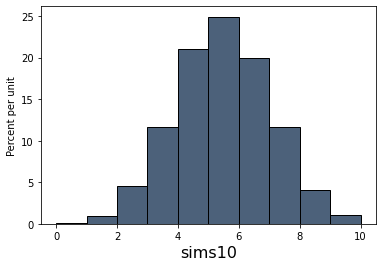

In [16]:
simtable = Table().with_column("sims10",trials10)
simtable.hist("sims10", bins=range(11))

Let's see what happens with 20 coin flips. First we create a bunch of simulations:

In [17]:
trials20 = [np.random.binomial(n=20, p=.5) for _ in range(ntrials)]

And then add the new trials to `simtable` using the `.with_column()` function.

In [18]:
simtable=simtable.with_column("sims20", trials20)
simtable

sims10,sims20
4,9
4,8
4,8
5,10
3,15
4,9
4,8
4,11
6,8
7,9


**Question 3.1 Make a histogram of the number of heads in the trials with 20 flips. Make sure to set the bins so there each one contains exactly one integer.**

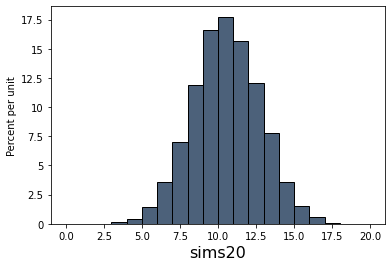

In [19]:
simtable.hist("sims20", bins=range(21))

Let's see what this looks like with a different probability of success. Here is a set of 10 trials with a higher probaility of success ($p = .7$)

In [20]:
trials_high = [np.random.binomial(n=10, p=.7) for _ in range(ntrials)]

**Question 3.2. Add this array to `simtable`, as a variable called `sims_high`, and create a histogram which shows the frequency of heads in these trials**

In [21]:
simtable=simtable.with_column("sims_high", trials_high)
simtable

sims10,sims20,sims_high
4,9,6
4,8,4
4,8,9
5,10,4
3,15,6
4,9,6
4,8,7
4,11,6
6,8,6
7,9,8


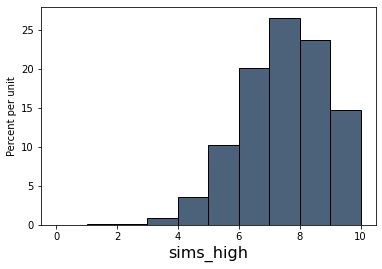

In [22]:
simtable.hist("sims_high", bins=range(11))

**Question 3.3. Compare this to the graph where $p=.5$**

Next we want to figure out exactly how often a voter is pivotal in different situations. To do this, let's create a variable called `pivot10` which is true when there are exactly 5 other voters choosing each candidate.

In [23]:
simtable = simtable.with_column("pivot10", simtable.column("sims10")==5)
simtable

sims10,sims20,sims_high,pivot10
4,9,6,False
4,8,4,False
4,8,9,False
5,10,4,True
3,15,6,False
4,9,6,False
4,8,7,False
4,11,6,False
6,8,6,False
7,9,8,False


We can then count the number of trials where a voter was pivotal.

In [24]:
sum(simtable.column("pivot10"))

2492

Since there were 10,000 trials, we can convert this into a percentage:

In [25]:
sum(simtable.column("pivot10"))/ntrials

0.2492

**Question 3.4. Write code to determine what proportion of the time a voter is pivotal when $n=20$**

In [26]:
simtable=simtable.with_column("pivot20", simtable.column("sims20")==10)
sum(simtable.column("pivot20"))/ntrials

0.1775

To explore how chaning the size of the electorate and the probabilities of voting affect the probability of being pivotal without having to go through all of these steps, we will define a function which does one simulation and then checks whether a new voter would be pivotal.

In [27]:
def one_pivot(n,p):
    return 1*(np.random.binomial(n=n,p=p)==n/2)

Run this a few times.

In [28]:
one_pivot(n=10, p=.6)

0

Let's see how the probability of being pivotal changes with a higher n. To do so, we will use the same looping trick to store 10,000 simulations in an array called piv_trials100. (Note we defined `ntrials=10,000` above)

In [29]:
def pivotal_prob(p):
    return sum(one_pivot(n=100, p=.5) for _ in range(ntrials))/ntrials
interact(pivotal_prob, p=(0,1, .1))

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.pivotal_prob(p)>

Or a lower p

In [30]:
piv_trials100 = [one_pivot(n=100, p=.4) for _ in range(ntrials)]
sum(piv_trials100)/ntrials

0.0107

**Question 3.5 Write a line of code to simulate how often a voter will be pivotal in an electorate with 50 voters and $p=.55$**

In [31]:
piv_trials35 = [one_pivot(n=50, p=.55) for _ in range(ntrials)]
sum(piv_trials35)/ntrials

0.0905

**Question 3.6 (Optional) Try running the one_pivot function with an odd number of voters. What happens and why?**

In [30]:
one_pivot(n=11, p=.5)

0

## Part 4. Pivotal votes with groups

To learn about situations like the electoral college, let's do a simluation with groups. Imagine there are three groups, who all make a choice by majority vote. The winning candidate is the one who wins a majority vote of the majority of groups, in this case at least two groups. 

Questions like this become interesting when the groups vary, maybe in size or in predisposition towards certain candidates. To get started, we will look at an example where all the groups have 50 voters. Group 1 leans against candidate A, group B is split, and group C leans towards group A.

We start by making a table with the number of votes for candidate A in each group. All groups have 50 members, but they have different probabilities of voting for A.

In [35]:
#Group sizes
n1=50
n2=50
n3=50
# Probability of voting for A, by group
p1=.4
p2=.5
p3=.6
# Creating arrays for simulations for each group
group1 = [np.random.binomial(n=n1, p=p1) for _ in range(ntrials)]
group2 = [np.random.binomial(n=n2, p=p2) for _ in range(ntrials)]
group3 = [np.random.binomial(n=n3, p=p3) for _ in range(ntrials)] 
#Putting the arrays into a table
grouptrials = Table().with_columns("votes1",group1,
                                 "votes2", group2,
                                 "votes3",group3)
grouptrials

votes1,votes2,votes3
23,26,34
16,25,33
25,23,29
18,31,30
21,27,33
22,35,35
22,28,28
20,28,27
20,21,31
21,16,32


Next we create a variable to check whether an individual voter would be pivotal if placed in each group.

In [33]:
grouptrials = grouptrials.with_columns("voter piv1", 1*(grouptrials.column("votes1")==n1/2),
                                       "voter piv2", 1*(grouptrials.column("votes2")==n2/2),
                                       "voter piv3", 1*(grouptrials.column("votes3")==n3/2))
grouptrials

votes1,votes2,votes3,voter piv1,voter piv2,voter piv3
19,23,37,0,0,0
25,24,28,1,0,0
21,21,30,0,0,0
24,21,28,0,0,0
27,28,32,0,0,0
21,22,30,0,0,0
19,32,31,0,0,0
17,22,30,0,0,0
27,20,25,0,0,1
21,25,31,0,1,0


Let's check how often voters in group 1 are pivotal

In [89]:
sum(grouptrials.column("voter piv1"))/ntrials

0.0401

**Question 4a. Check how often voters in groups 2 and 3 are pivotal.**
```
BEGIN QUESTION
name: q4a
```

In [90]:
group2pivotal = sum(grouptrials.column("voter piv2"))/ntrials #SOLUTION
group3pivotal = sum(grouptrials.column("voter piv3"))/ntrials #SOLUTION
group2pivotal, group3pivotal

(0.1151, 0.0392)

In [91]:
## Test ## 
0 <= group2pivotal <= 1

True

In [92]:
## Test ##
0 <= group3pivotal <= 1

True

**Question: you should get that two of the groups have a similar probability of being pivotal, but one is different. Which is different any why?**
```
BEGIN QUESTION
name: q4b
manual: true
```

**SOLUTION**

Now let's check if each group is pivotal, i.e., if the group changing their vote changes which candidate wins the majority of groups. [Note: tricky stuff about ties here is important]

In [94]:
group1piv = 1*((grouptrials.column("votes2") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes2") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
group2piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
group3piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes2") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes2") <= n3/2))

grouptrials = grouptrials.with_columns("group piv1", group1piv,
                                       "group piv2", group2piv,
                                       "group piv3", group3piv)
grouptrials

votes1,votes2,votes3,voter piv1,voter piv2,voter piv3,group piv1,group piv2,group piv3
18,30,29,0,0,0,0,1,1
16,24,31,0,0,0,1,1,0
28,28,29,0,0,0,0,0,0
19,29,34,0,0,0,0,1,1
24,22,23,0,0,0,0,0,0
24,23,28,0,0,0,1,1,0
18,21,26,0,0,0,1,1,0
17,26,28,0,0,0,0,1,1
19,23,23,0,0,0,0,0,0
17,20,34,0,0,0,1,1,0


**How often is each group pivotal?**
```
BEGIN QUESTION
name: q4c
```

In [98]:
group1_pivotal_rate = sum(grouptrials.column("group piv1"))/ntrials # SOLUTION
group2_pivotal_rate = sum(grouptrials.column("group piv2"))/ntrials # SOLUTION
group3_pivotal_rate = sum(grouptrials.column("group piv3"))/ntrials # SOLUTION
group1_pivotal_rate, group2_pivotal_rate, group3_pivotal_rate

(0.5764, 0.8946, 0.5709)

In [111]:
## Test ##
0 <= group1_pivotal_rate <= 1

True

In [110]:
## Test ##
0 <= group2_pivotal_rate <= 1

True

In [109]:
## Test ##
0 <= group3_pivotal_rate <= 1

True

```
BEGIN QUESTION
name: q4d
manual: true
```
**Two groups should have similar probabilities, with one group fairly different. Why is the case?**

**SOLUTION**: Answer to 2c here

A voter will be pivitol "overall" if they are pivotal within the group and the group is pivotal in the election. We can compute this by multiplying...

In [102]:
grouptrials = grouptrials.with_columns("overall piv 1", 
                                      grouptrials.column("voter piv1")*grouptrials.column("group piv1"),
                                       "overall piv 2", 
                                      grouptrials.column("voter piv2")*grouptrials.column("group piv2"),
                                       "overall piv 3", 
                                      grouptrials.column("voter piv3")*grouptrials.column("group piv3"))

grouptrials

votes1,votes2,votes3,voter piv1,voter piv2,voter piv3,group piv1,group piv2,group piv3,overall piv1,overall piv2,overall piv3,overall piv 1,overall piv 2,overall piv 3
18,30,29,0,0,0,0,1,1,0,0,0,0,0,0
16,24,31,0,0,0,1,1,0,0,0,0,0,0,0
28,28,29,0,0,0,0,0,0,0,0,0,0,0,0
19,29,34,0,0,0,0,1,1,0,0,0,0,0,0
24,22,23,0,0,0,0,0,0,0,0,0,0,0,0
24,23,28,0,0,0,1,1,0,0,0,0,0,0,0
18,21,26,0,0,0,1,1,0,0,0,0,0,0,0
17,26,28,0,0,0,0,1,1,0,0,0,0,0,0
19,23,23,0,0,0,0,0,0,0,0,0,0,0,0
17,20,34,0,0,0,1,1,0,0,0,0,0,0,0


**What is the probability of a voter in each group being pivotal?**
```
BEGIN QUESTION
name: q4e
```

In [106]:
voter_1_pivotal_prob = sum(grouptrials.column("overall piv 1"))/ntrials
voter_2_pivotal_prob = sum(grouptrials.column("overall piv 2"))/ntrials # SOLUTION
voter_3_pivotal_prob = sum(grouptrials.column("overall piv 3"))/ntrials # SOLUTION

voter_1_pivotal_prob, voter_2_pivotal_prob, voter_3_pivotal_prob

(0.0215, 0.105, 0.0224)

In [108]:
# TEST 
0 <= voter_2_pivotal_prob <= .25

True

In [107]:
# TEST 
0 <= voter_3_pivotal_prob <= .25

True

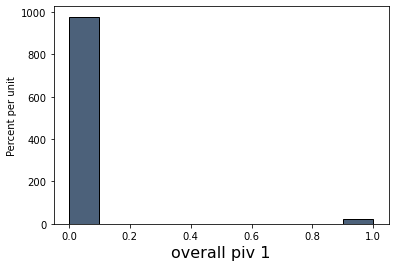

In [105]:
grouptrials.hist("overall piv 1")

In [32]:
pd.crosstab(grouptrials.column("voter piv1"), grouptrials.column("group piv1"))

col_0,0,1
row_0,,
0,4106,5494
1,154,246


In [34]:
pd.crosstab(grouptrials.column("voter piv1"), grouptrials.column("group piv1"), normalize=True)

col_0,0,1
row_0,,
0,0.4106,0.5494
1,0.0154,0.0246


Here is a function that ties it all together.

In [61]:
def maketable(n1=50, n2=50, n3=50, p1=.4, p2=.5, p3=.6, ntrials=10000):
    group1 = [np.random.binomial(n=n1, p=p1) for _ in range(ntrials)]
    group2 = [np.random.binomial(n=n2, p=p2) for _ in range(ntrials)]
    group3 = [np.random.binomial(n=n3, p=p3) for _ in range(ntrials)] 
    grouptrials = Table().with_columns("votes1",group1,
                                 "votes2", group2,
                                 "votes3",group3)
    grouptrials = grouptrials.with_columns("voter piv1", 1*(grouptrials.column("votes1")==n1/2),
                                       "voter piv2", 1*(grouptrials.column("votes2")==n2/2),
                                       "voter piv3", 1*(grouptrials.column("votes3")==n3/2))
    group1piv = 1*((grouptrials.column("votes2") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes2") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
    group2piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
    group3piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes2") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes2") <= n3/2))
    grouptrials = grouptrials.with_columns("group piv1", group1piv,
                                       "group piv2", group2piv,
                                       "group piv3", group3piv)
    grouptrials = grouptrials.with_columns("overall piv1", 
                                      grouptrials.column("voter piv1")*grouptrials.column("group piv1"),
                                       "overall piv2", 
                                      grouptrials.column("voter piv2")*grouptrials.column("group piv2"),
                                       "overall piv3", 
                                      grouptrials.column("voter piv3")*grouptrials.column("group piv3"))
    return grouptrials

In [62]:
test = maketable()
test

votes1,votes2,votes3,voter piv1,voter piv2,voter piv3,group piv1,group piv2,group piv3,overall piv1,overall piv2,overall piv3
18,22,31,0,0,0,1,1,0,0,0,0
24,25,31,0,1,0,1,1,1,0,1,0
22,31,28,0,0,0,0,1,1,0,0,0
18,21,32,0,0,0,1,1,0,0,0,0
20,20,25,0,0,1,1,1,0,0,0,0
27,30,29,0,0,0,0,0,0,0,0,0
18,25,33,0,1,0,1,1,1,0,1,0
20,29,28,0,0,0,0,1,1,0,0,0
17,19,30,0,0,0,1,1,0,0,0,0
21,25,30,0,1,0,1,1,1,0,1,0


Do some stuff about when individuals are pivotal. 

In [63]:
sum(grouptrials.column("overall piv1"))/ntrials, sum(grouptrials.column("overall piv2"))/ntrials,  sum(grouptrials.column("overall piv3")) /ntrials

(0.0241, 0.1059, 0.0237)

See if you can get the probability of 1 and 2 being pivotal to be about hte same by changing `n1`. Why does this work?

In [66]:
sim_elec_2 = maketable(n1=10, n2=50, n3=50, p1=.4, p2=.5, p3=.6)

In [67]:
sum(sim_elec_2.column("overall piv1"))/ntrials, sum(sim_elec_2.column("overall piv2"))/ntrials,  sum(sim_elec_2.column("overall piv3")) /ntrials

(0.1188, 0.1078, 0.0234)